In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\wjdgu\\Desktop\\ML'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv('./ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


In [5]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
corolla.Fuel_Type.unique() 

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

## 범주형 변수를 이진형 변수로 변환

In [7]:
## 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)


In [8]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [10]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [12]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d , 'CNG' : dummy_c})

In [13]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [14]:
# 불필요 변수 제거
corolla_ = corolla.drop(['Id','Model','Fuel_Type'], axis = 1, inplace=False)
# Fule 추가
mlr_data = pd.concat((corolla_, Fuel), 1)

mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [15]:
mlr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   Mfg_Month         1436 non-null   int64
 3   Mfg_Year          1436 non-null   int64
 4   KM                1436 non-null   int64
 5   HP                1436 non-null   int64
 6   Met_Color         1436 non-null   int64
 7   Automatic         1436 non-null   int64
 8   cc                1436 non-null   int64
 9   Doors             1436 non-null   int64
 10  Cylinders         1436 non-null   int64
 11  Gears             1436 non-null   int64
 12  Quarterly_Tax     1436 non-null   int64
 13  Weight            1436 non-null   int64
 14  Mfr_Guarantee     1436 non-null   int64
 15  BOVAG_Guarantee   1436 non-null   int64
 16  Guarantee_Period  1436 non-null   int64
 17  ABS               1436 non-null  

In [16]:
# bias 추가
mlr_data = sm.add_constant(mlr_data,has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [17]:
mlr_data.columns.difference(['Price'])

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [18]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [19]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [20]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     308.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:14:29   Log-Likelihood:                -8455.5
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -369.2058    138.832     -2.659      0.008    -641.651     -96.761
Age_08_04         -117.9860      4.108    -28.718      0.000    -126.048    -109.924
Airbag_1          -132.7879    278.568     -0.477      0.634    -679.453     413.877
Airbag_2             6.9453    138.207      0.050      0.960    -264.273     278.164
Airco              249.5222     97.735      2.553      0.011      57.727     441.317
Automatic          269.9391    156.468      1.725      0.085     -37.116     576.994
Automatic_airco   2303.6932    195.764     11.768      0.000    1919.523    2687.863
BOVAG_Guarantee    566.8478    134.088      4.227      0.000     303.712     829.984
Backseat_Divider  -295.1382    140.656     -2.098      0.036    -571.163     -19.113
Boardcomputer     -353.2325    124.503     -2.837      0.005    -597.558    -108.907
CD_Player          207.1491    106.537      1.944      0.052      -1.920     416.218
CNG              -1639.0439    261.720     -6.263      0.000   -2152.646   -1125.442
Central_Lock      -140.1248    153.571     -0.912      0.362    -441.495     161.245
Cylinders           -0.0282      0.002    -11.733      0.000      -0.033      -0.024
Diesel            1263.8887    318.214      3.972      0.000     639.422    1888.355
Doors               89.0716     42.282      2.107      0.035       6.096     172.047
Gears              -61.6679    209.157     -0.295      0.768    -472.120     348.785
Guarantee_Period    75.0151     14.081      5.327      0.000      47.383     102.648
HP                  47.1854      5.893      8.008      0.000      35.622      58.749
KM                  -0.0161      0.001    -11.883      0.000      -0.019      -0.013
Met_Color            7.6209     80.308      0.095      0.924    -149.975     165.217
Metallic_Rim       204.2636     99.155      2.060      0.040       9.681     398.846
Mfg_Month          -95.9912     10.803     -8.886      0.000    -117.191     -74.792
Mfg_Year             3.6878      0.906      4.069      0.000       1.909       5.467
Mfr_Guarantee      209.4915     78.404      2.672      0.008      55.632     363.351
Mistlamps           20.7943    112.818      0.184      0.854    -200.600     242.189
Petrol             375.1481    240.008      1.563      0.118     -95.846     846.142
Power_Steering     199.1338    342.298      0.582      0.561    -472.595     870.863
Powered_Windows    481.0735    154.136      3.121      0.002     178.596     783.551
Quarterly_Tax       17.5816      1.864      9.432      0.000      13.924      21.240
Radio             1387.5713    805.468      1.723      0.085    -193.087    2968.230
Radio_cassette   -1493.7522    803.285     -1.860      0.063   -3070.126      82.621
Sport_Model        443.7222     92.948      4.774      0.000     261.319     626.125
Tow_Bar           -221.

## VIF를 통한 다중공선성 확인 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\wjdgu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\wjdgu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


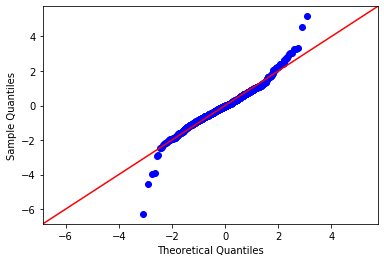

In [22]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

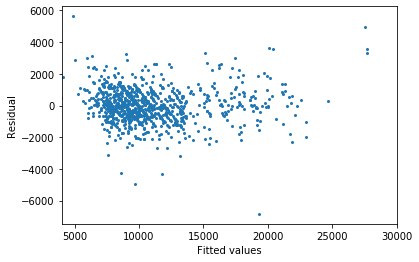

In [23]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [24]:
 ## 검증 데이터에 대한 예측  
pred_y2 = fitted_full_model.predict(test_x)

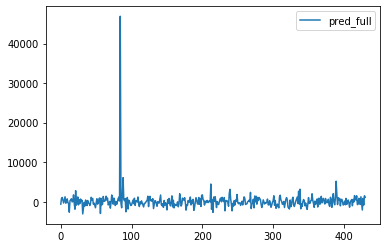

In [25]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred=pred_y2)

6230743.743172799

# 변수선택법

In [28]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5D6ECEF88>, 'AIC': 19115.989124399384}


In [29]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1d5d6ed2048>,
 'AIC': 16979.08698364554}

In [30]:
import time
import itertools

# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.5099661350250244 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17602.7
Name: 211, dtype: object


In [31]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [32]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.19447755813598633 seconds.
Processed  630 models on 2 predictors in 1.5897538661956787 seconds.
Processed  7140 models on 3 predictors in 16.411142349243164 seconds.
Total elapsed time: 18.46963858604431 seconds.


In [33]:
models

,AIC,model
1,17866.017906,<statsmodels.regression.linear_model.Regressio...
2,17602.653858,<statsmodels.regression.linear_model.Regressio...
3,17462.547990,<statsmodels.regression.linear_model.Regressio...


In [34]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1900.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:14:51   Log-Likelihood:                -8727.3
No. Observations:                1005   AIC:                         1.746e+04
Df Residuals:                    1001   BIC:                         1.748e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0238      0.001    -16.744      0.000      -0.027      -0.021
Mfg_Year    1510.2572     39.222     38.505      0.000    1433.290    1587.224
Weight        17.8613      0.951     18.785      0.000      15.995      19.727
const      -3.027e+06    7.8e+04    -38.823      0.000   -3.18e+06   -2.87e+06
==============================================================================
Omnibus:                      210.416   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2030.015
Skew:                          -0.663   Prob(JB):                         0.00
Kurtosis:                       9.835   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91301
full model AIC:  16979.08698
full model MSE:  13688535.22804
selected model Rsquared:  0.85062
selected model AIC:  17462.54799
selected model MSE:  13688535.22804


Text(0, 0.5, 'BIC')

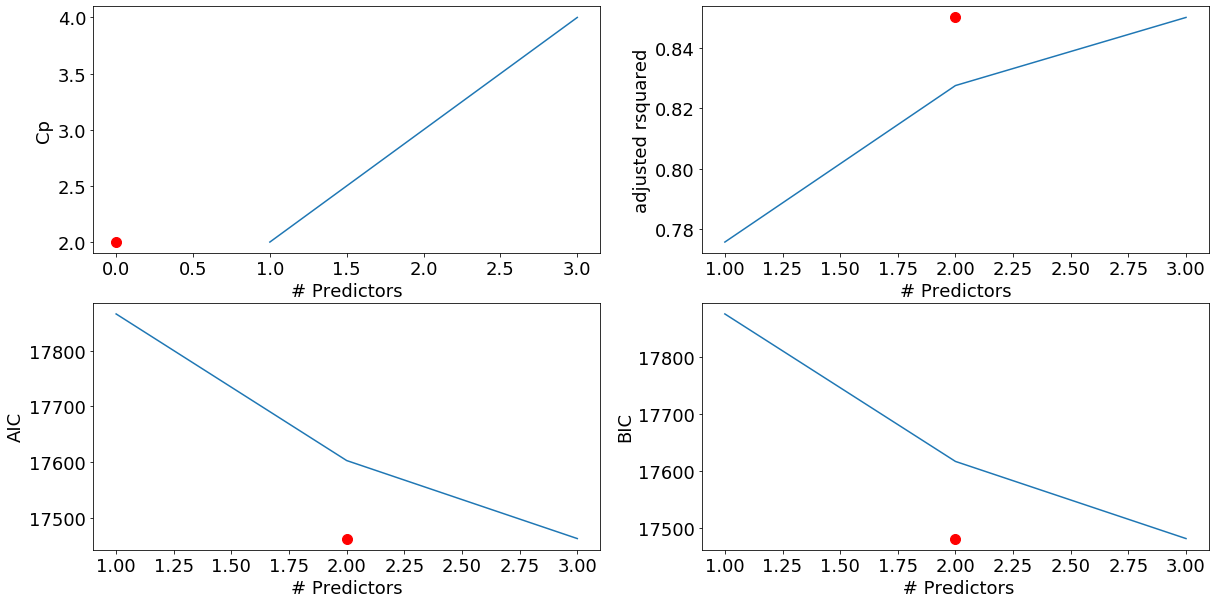

In [36]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [37]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [38]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [39]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.0857703685760498
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F57D2E08>
Processed  35 models on 2 predictors in 0.07080841064453125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F57DAD08>
Processed  34 models on 3 predictors in 0.06881856918334961
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F5834C88>
Processed  33 models on 4 predictors in 0.07280659675598145
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F5779088>
Processed  32 models on 5 predictors in 0.09574222564697266
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM',

Processed  12 models on 25 predictors in 0.05884265899658203
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'Airco', 'Mfr_Guarantee', 'CD_Player', 'Backseat_Divider', 'Age_08_04', 'Doors', 'Metallic_Rim', 'Automatic', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F57B4F08>
Total elapsed time: 2.206829071044922 seconds.


In [40]:
Forward_best_model.aic

16967.16899333138

In [55]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     425.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:49:41   Log-Likelihood:                -8458.6
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     980   BIC:                         1.709e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1151.8881    128.185      8.986      0.000     900.339    1403.438
Automatic_airco   2332.6447    184.147     12.667      0.000    1971.278    2694.012
KM                  -0.0163      0.001    -12.091      0.000      -0.019      -0.014
Weight               8.3556      1.217      6.865      0.000       5.967      10.744
HP                  46.6170      5.697      8.182      0.000      35.437      57.797
Quarterly_Tax       17.3634      1.813      9.578      0.000      13.806      20.921
Petrol            -895.0020    491.052     -1.823      0.069   -1858.637      68.633
Guarantee_Period    73.7536     13.881      5.313      0.000      46.513     100.994
Powered_Windows    380.2867     89.094      4.268      0.000     205.450     555.123
Sport_Model        439.6437     89.511      4.912      0.000     263.988     615.300
BOVAG_Guarantee    564.2199    133.030      4.241      0.000     303.164     825.275
Tow_Bar           -228.5736     81.805     -2.794      0.005    -389.106     -68.041
cc                  -3.2257      0.555     -5.815      0.000      -4.314      -2.137
CNG              -2854.1526    520.180     -5.487      0.000   -3874.947   -1833.359
Boardcomputer     -339.6119    123.252     -2.755      0.006    -581.480     -97.743
ABS               -344.9308    110.457     -3.123      0.002    -561.691    -128.171
Airco              243.5626     93.800      2.597      0.010      59.492     427.634
Mfr_Guarantee      211.3770     77.297      2.735      0.006      59.690     363.064
CD_Player          226.1687    103.309      2.189      0.029      23.437     428.900
Backseat_Divider  -276.3915    126.430     -2.186      0.029    -524.496     -28.287
Age_08_04          -21.3498     10.669     -2.001      0.046     -42.287      -0.412
Doors               89.9474     41.587      2.163      0.031       8.337     171.558
Metallic_Rim       196.1682     93.957      2.088      0.037      11.788     380.548
Automatic          271.3589    155.287      1.747      0.081     -33.375     576.093
const            -2.301e+06   2.57e+05     -8.961      0.000    -2.8e+06    -1.8e+06
==============================================================================
Omnibus:                       85.692   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.230
Skew:                           0.008   Prob(JB):                    9.60e-107
Kurtosis:                       6.415   Cond. No.                     5.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+08. This might indicate that there are
strong multicollinearity or other numerical pr

# 후진소거법

In [56]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [57]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [58]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.24733805656433105
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F472B388>
Processed  35 models on 34 predictors in 0.17579865455627441
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_

In [59]:
Backward_best_model.aic

16966.400874765113

In [60]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     394.2
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:52:43   Log-Likelihood:                -8456.2
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     978   BIC:                         1.710e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -365.7740    110.739     -3.303      0.001    -583.088    -148.460
Airco              242.2247     93.796      2.582      0.010      58.160     426.290
Automatic          270.4340    155.083      1.744      0.082     -33.901     574.769
Automatic_airco   2315.1044    184.416     12.554      0.000    1953.209    2677.000
BOVAG_Guarantee    572.7427    133.115      4.303      0.000     311.519     833.966
Backseat_Divider  -285.3561    126.681     -2.253      0.025    -533.955     -36.757
Boardcomputer     -353.3802    123.524     -2.861      0.004    -595.783    -110.978
CD_Player          206.1442    104.732      1.968      0.049       0.618     411.670
CNG              -1974.5927    379.582     -5.202      0.000   -2719.481   -1229.704
Cylinders        -6.673e+05   2.29e+04    -29.196      0.000   -7.12e+05   -6.22e+05
Diesel             879.1336    490.533      1.792      0.073     -83.484    1841.751
Doors               89.4780     41.619      2.150      0.032       7.805     171.151
Guarantee_Period    74.8072     13.903      5.381      0.000      47.524     102.091
HP                  46.7305      5.693      8.208      0.000      35.558      57.903
KM                  -0.0162      0.001    -12.056      0.000      -0.019      -0.014
Metallic_Rim       198.9652     93.843      2.120      0.034      14.808     383.123
Mfg_Month           21.7869     10.667      2.042      0.041       0.853      42.721
Mfg_Year          1418.3199     48.691     29.129      0.000    1322.770    1513.870
Mfr_Guarantee      208.1802     77.229      2.696      0.007      56.626     359.734
Powered_Windows    374.7457     89.037      4.209      0.000     200.021     549.471
Quarterly_Tax       17.4566      1.811      9.640      0.000      13.903      21.010
Radio             1417.3825    789.911      1.794      0.073    -132.733    2967.498
Radio_cassette   -1529.6771    789.357     -1.938      0.053   -3078.705      19.351
Sport_Model        434.5059     89.529      4.853      0.000     258.815     610.197
Tow_Bar           -224.3710     82.582     -2.717      0.007    -386.430     -62.312
Weight               8.3299      1.216      6.851      0.000       5.944      10.716
cc                  -3.2210      0.554     -5.812      0.000      -4.309      -2.134
const            -1.668e+05   5713.679    -29.196      0.000   -1.78e+05   -1.56e+05
==============================================================================
Omnibus:                       86.130   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.851
Skew:                           0.023   Prob(JB):                    9.52e-108
Kurtosis:                       6.430   Cond. No.                     1.31e+16
=====================================================

# 단계적 선택법

In [46]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [61]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.709991455078125
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B61B88>
forward
Processed  1 models on 0 predictors in 0.03893280029296875
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B560C8>
Processed  35 models on 2 predictors in 0.23719334602355957
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B61988>
forward
Processed  2 models on 1 predictors in 0.010970830917358398
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F47674C8>
Processed  34 models on 3 predictors in 0.35393285751342773
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.Regre

Processed  14 models on 13 predictors in 0.06781625747680664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B4ED08>
Processed  22 models on 15 predictors in 0.109710693359375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5F36CF988>
forward
Processed  15 models on 14 predictors in 0.041887760162353516
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boar

Processed  12 models on 25 predictors in 0.05385565757751465
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'CD_Player', 'Age_08_04', 'Metallic_Rim', 'Doors', 'Diesel', 'Automatic', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B679C8>
forward
Processed  25 models on 24 predictors in 0.11369657516479492
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'CD_Player', 'Age_08_04', 'Metallic_Rim', 'Doors', 'Diesel', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object 

Processed  11 models on 26 predictors in 0.05684828758239746
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'CD_Player', 'Age_08_04', 'Metallic_Rim', 'Doors', 'Diesel', 'Automatic', 'Cylinders', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D5E3B44248>
forward
Processed  26 models on 25 predictors in 0.10671830177307129
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'Sport_Model', 'BOVAG_Guarantee', 'Tow_Bar', 'cc', 'CNG', 'Boardcomputer', 'ABS', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'CD_Player', 'Age_08_04', 'Metallic_Rim', 'Doors', 'Diesel', 'Automatic', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.Regres

In [62]:
Stepwise_best_model.aic

16967.168993331397

# 성능평가 

In [65]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (28,) (26,)


In [66]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [67]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [68]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [69]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   6.23074e+06  6.15517e+06  6.15596e+06  6.15517e+06
RMSE      2496.15      2480.96      2481.12      2480.96
MAE         900.5      893.427      896.359      893.427
MAPE      8.53581      8.46674      8.48912      8.46674


In [70]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
25
28
26
